Rough Implementation referred from professor's assignment and the internet to illustrate UCB for random data

In [ ]:
#Basic imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def UCB(hat_mu,reward,A_t,N,delta,k,i):
    
    if k < i-1:
        hat_mu[A_t] = hat_mu[A_t] + reward
        A_next = k + 1
    else:
        hat_mu[A_t] = hat_mu[A_t] + reward
        ucb = hat_mu/N + np.sqrt((2*np.log(1/delta))/N) 
        A_next = np.argmax(ucb)

    return A_next,hat_mu


#parameters of problem 
d = 2
T = 1000
rep = 200
number_of_arms = 2
number_of_Deltas = 20

In [ ]:
delta = 1/T**2
arm = np.matrix([[0,1]])
reg = np.zeros([number_of_Deltas,rep])

count = 0
for i in np.arange(0,1,1/number_of_Deltas)+ 1/number_of_Deltas:
    
    mu = np.matrix([[0,-i]]).T
    
    for j in range(0,rep,1):
        
        #initialization
        A_t = 0
        hat_mu = np.zeros([number_of_arms,1])
        N = np.zeros([number_of_arms,1])
        
        for k in range(0,T,1):
            N[A_t] = N[A_t] + 1
            reward = mu[A_t] + np.random.normal(0,1)
            A_t,hat_mu = UCB(hat_mu,reward,A_t,N,delta,k,2)
        reg[count,j] = N[1] * i
    count = count + 1

    
fin_UCB = (np.sum(reg,axis=1)) / rep

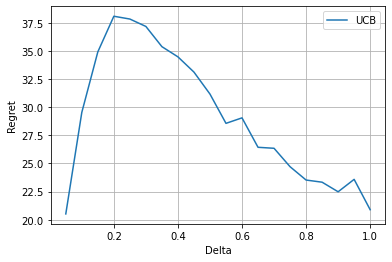

In [ ]:
#plot
Delta = np.arange(0,1,1/number_of_Deltas) + 1/number_of_Deltas
#plt.plot(Delta, fin_LinUCB,label="LinUCB")
plt.plot(Delta, fin_UCB,label="UCB")
plt.xlabel("Delta")
plt.ylabel("Regret")
plt.legend()
plt.grid()
plt.show()

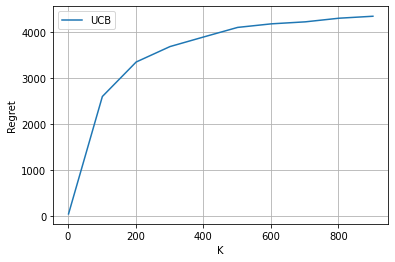

In [ ]:
def find_gap(arm,theta):   
    return np.max(arm*theta)-arm*theta

def sample_spherical(npoints, ndim=5):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec
def UCB(hat_mu,reward,A_t,N,delta,k,i):
    
    if k < i-1:
        hat_mu[A_t] = hat_mu[A_t] + reward
        A_next = k + 1
    else:
        hat_mu[A_t] = hat_mu[A_t] + reward
        ucb = hat_mu/N + np.sqrt((2*np.log(1/delta))/N) 
        A_next = np.argmax(ucb)

    return A_next,hat_mu

#parameters of problem 
d = 5
theta = np.sqrt(1/30) * np.matrix([[4,3,2,1,0]]).T

arms_set = np.matrix(sample_spherical(1000)).T

T = 5000
rep = 100
number_of_arms = 1000

sample = 100
sample_K = np.size(np.arange(2,1000,sample))
delta = 1/T**2

reg = np.zeros([sample_K,rep])

count = 0
for i in np.arange(2,1000,sample):
    arm = arms_set[0:i,:]
    gap = find_gap(arm,theta)
    
    for j in range(0,rep,1):
        
        #initialization
        A_t = 0
        hat_mu = np.zeros([i,1])
        N = np.zeros([i,1])
        
        for k in range(0,T,1):
            N[A_t] = N[A_t] + 1
            reward = theta.T * arm[A_t].T + np.random.normal(0,1)
            A_t,hat_mu = UCB(hat_mu,reward,A_t,N,delta,k,i)
        reg[count,j] = N.T * gap
    count = count + 1

fin_UCB = (np.sum(reg,axis=1)) / rep


K = np.arange(2,1000,sample)
plt.plot(K, fin_UCB,label="UCB")
plt.xlabel("K")
plt.ylabel("Regret")
plt.legend()
plt.grid()
plt.show()

UCB with Random Data

In [ ]:
class UCB1():
    def __init__(self, counts, values):
      #Counts: Represent recorded times when arm was pulled.
      #Values: Represent the known mean reward. 
        self.counts = counts 
        self.values = values 
        return

    # Initializing k number of arms
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return
    
    # UCB arm selection based on maximum reward of arm
    def select_arm(self):
        n_arms = len(self.counts)
        for arm in range(n_arms):
            if self.counts[arm] == 0:
                return arm
    
        ucb_values = [0.0 for arm in range(n_arms)]
        total_counts = sum(self.counts)
        
        for arm in range(n_arms):
            bonus = math.sqrt((2 * math.log(total_counts)) / float(self.counts[arm]))
            ucb_values[arm] = self.values[arm] + bonus
        return ucb_values.index(max(ucb_values))
    
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        
        #value updation
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [ ]:
class BernoulliArm():
    def __init__(self, p):
        self.p = p
    
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

In [ ]:
def test_algorithm(algo, arms, num_sims, horizon):
    
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims *horizon)]
    times = [0.0 for i in range (num_sims*horizon)]
    
    for sim in range(num_sims):
        sim += 1
        algo.initialize(len(arms))
        #algo.initialize(arms)
        
        for t in range(horizon):
            t += 1
            index = (sim -1) * horizon + t -1
            sim_nums[index] = sim
            times[index] = t
            
            # Select best arm
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            
            # Pull chosen arm
            reward = arms[chosen_arm].draw()
            rewards[index] = reward
            
            if t ==1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index-1] + reward
                
            algo.update(chosen_arm, reward)
        #print(cumulative_rewards)
    
    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]
    #plt.plot(cumulative_rewards,sim_nums) 
    

In [ ]:
import random
import math
import numpy as np
import pandas as pd

random.seed(2)
# out of 5 arms, 1 arm is clearly the best
means = [0.1, 0.1, 0.1, 0.1, 0.9]
#means=[0.3, 0.5, 0.6, 0.8, 0.10]
n_arms = len(means)
# Shuffling arms
random.shuffle(means)

# List of arm and reward
arms = list(map(lambda mu: BernoulliArm(mu), means))
#arms=5
print("Best arm is " + str(np.argmax(means)))

f = open("standard_ucb_results.csv", "w+")

# Create 1 round of 50 simulations
algo = UCB1([], [])
algo.initialize(n_arms)
results = test_algorithm(algo, arms, 50, 100)
print(results,sep=" ")
print(results[4]) #rewards
   

for i in range(len(results[0])):
    f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")
f.close()

Best arm is 3
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [ ]:
#@title Plotting
df = pd.read_csv("standard_ucb_results.csv", sep = "\t", header = None, names = ["simulation_num", "step", "chosen_arm", "reward", "cum_reward"])
df.head()
# Create a flag for each step to see if best arm was chosen
df["chose_correct"] = np.select(
    [
        df["chosen_arm"] == 2,
        df["chosen_arm"] != 2
    ],
    [
        1,
        0
    ]
)
# Perform average/mean for each step for all simulations and epsilon
df_chose_correctly = df.loc[:,["step", "chose_correct"]].groupby(["step"]).agg("mean")

# Remove multi index grouping
df_chose_correctly = df_chose_correctly.reset_index()
import altair as alt
alt.Chart(df_chose_correctly).mark_line().encode(
    alt.X("step:Q", title = "Time Step"),
    alt.Y("chose_correct:Q", title = "Mean Rate of Choosing Best Arm", scale = alt.Scale(domain = [0, 1])),
).properties(
    title = "UCB: Mean Rate of Choosing Best Arm from 50 Simulations. 5 Arms = [4 x 0.1, 1 x 0.9]",
)


alt.Chart(...)

In [ ]:
df_cumreward = df.loc[:,["step", "cum_reward"]].groupby(["step"]).agg("mean").reset_index()
alt.Chart(df_cumreward).mark_line().encode(
    alt.X("step:Q", title = "Time Step"),
    alt.Y("cum_reward:Q", title = "Mean Cumulative Reward")
).properties(
    title = "Mean Cumulative Reward from 50 Runs with 5 Arms",
)

alt.Chart(...)

UCB with stock data

In [ ]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv

sns.set_style('darkgrid')
np.random.seed(42)

In [ ]:
with open('appl_5yrs.csv', newline='') as csvfile:
    data1 = list(csv.reader(csvfile))

with open('amd_5yrs.csv', newline='') as csvfile:
    data2 = list(csv.reader(csvfile))

with open('amzn_5yrs.csv', newline='') as csvfile:
    data3 = list(csv.reader(csvfile))

with open('msft_5yrs.csv', newline='') as csvfile:
    data4 = list(csv.reader(csvfile))

with open('qcom_5yrs.csv', newline='') as csvfile:
    data5 = list(csv.reader(csvfile))

appl = np.array(data1)
amd = np.array(data2)
amzn = np.array(data3)
msft = np.array(data4)
qcom = np.array(data5)

appl_start = appl[:,3]
appl_end   = appl[:,1]
appl_diff = []
appl_data = [0]*(appl_start.shape[0]-1)

amd_start = amd[:,3]
amd_end   = amd[:,1]
amd_diff = []
amd_data = [0]*(amd_start.shape[0]-1)

amzn_start = amzn[:,3]
amzn_end   = amzn[:,1]
amzn_diff = []
amzn_data = [0]*(amzn_start.shape[0]-1)

msft_start = msft[:,3]
msft_end   = msft[:,1]
msft_diff = []
msft_data = [0]*(msft_start.shape[0]-1)

qcom_start = qcom[:,3]
qcom_end   = qcom[:,1]
qcom_diff = []
qcom_data = [0]*(qcom_start.shape[0]-1)

#print(len(appl_data))
#print(appl_start.shape[0])
size = appl_start.shape[0]  # all sizes same

for i in range(1,size):
  diff1 = float(appl_end[i][1:]) - float(appl_start[i][1:])
  diff2 = float(amd_end[i][1:]) - float(amd_start[i][1:])
  diff3 = float(amzn_end[i][1:]) - float(amzn_start[i][1:])
  diff4 = float(msft_end[i][1:]) - float(msft_start[i][1:])
  diff5 = float(qcom_end[i][1:]) - float(qcom_start[i][1:])
  appl_diff.append(diff1)
  amd_diff.append(diff2)
  amzn_diff.append(diff3)
  msft_diff.append(diff4)
  qcom_diff.append(diff5)

for i in range(1,size-1):
  if (appl_diff[i] > 1):
    appl_data[i] = 1
  if (amd_diff[i] > 1):
    amd_data[i] = 1
  if (amzn_diff[i] > 1):
    amzn_data[i] = 1
  if (msft_diff[i] > 1):
    msft_data[i] = 1
  if (qcom_diff[i] > 1):
    qcom_data[i] = 1

# all the above five lists are in reverse order: lower the index, newer the data
# reverse the lists: lower the index, older the data - easier to traverse
appl_data.reverse()
amd_data.reverse()
amzn_data.reverse()
msft_data.reverse()
qcom_data.reverse()

# Number of 1s in the above lists
print(appl_data.count(1))
print(amd_data.count(1))
print(amzn_data.count(1))
print(msft_data.count(1))
print(qcom_data.count(1))


171
166
591
300
207


Best arm is 3


TypeError: ignored

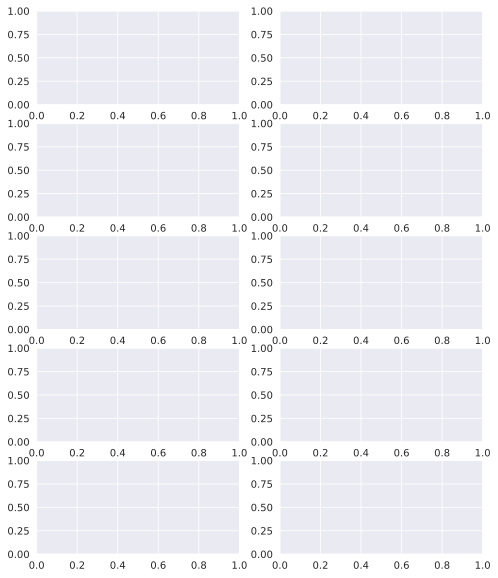

In [ ]:
def pullArm(i, index):
  if (i == 0):
    return appl_data[index]
  if (i == 1):
    return amd_data[index]
  if (i == 2):
    return amzn_data[index]
  if (i == 3):
    return msft_data[index]
  if (i == 4):
    return qcom_data[index]

# Define plotting functions
# Iterations to plot
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]


def plot(priors, step, ax):
    """Plot the priors for the current step."""
    plot_x = np.linspace(0.001, .999, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    ax.set_xlim([0, 1])
    ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')

# Simulate multi-armed bandit process and update posteriors

# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

def test_algorithm(algo, arms, num_sims, horizon):
    
    # Initialise variables for duration of accumulated simulation (num_sims * horizon_per_simulation)
    #num_sims: Represents the number of independent simulations, each of length equal to ‘horizon’.
    #horizon: Represents the number of time steps/trials per round of simulation
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims *horizon)]
    times = [0.0 for i in range (num_sims*horizon)]
    
    for sim in range(num_sims):
        sim += 1
        algo.initialize(len(arms))
        #algo.initialize(arms)
        
        for t in range(horizon):
            t += 1
            index = (sim -1) * horizon + t -1
            sim_nums[index] = sim
            times[index] = t
            
            # Selection of best arm and engaging it
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            
            # Engage chosen Bernoulli Arm and obtain reward info
            reward = pullArm(chosen_arm,sim_nums)
            rewards[index] = reward
            
            if t ==1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index-1] + reward
                
            algo.update(chosen_arm, reward)
        #print(cumulative_rewards)
    
    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]

random.seed(42)
# out of 5 arms, 1 arm is clearly the best
means = [0.1, 0.1, 0.1, 0.1, 0.9]
#means=[0.3, 0.5, 0.6, 0.8, 0.10]
n_arms = len(means)
# Shuffling arms
random.shuffle(means)

# Create list of Bernoulli Arms with Reward Information
arms = list(map(lambda mu: BernoulliArm(mu), means))

print("Best arm is " + str(np.argmax(means)))

f = open("standard_ucb_results.csv", "w+")

# Create 1 round of 50 simulations
algo = UCB1([], [])
algo.initialize(n_arms)
results = test_algorithm(algo, arms, 50, 5)
plot(results[4],times,next(axs))
#print(results,sep=" ")
#print(results[4]) 

plt.tight_layout()
plt.show()